### Dependent libraries

In [1]:
library(data.table)
library(ggplot2)
library(Hmisc)
library(MASS)
library(rmeta)
library(ResourceSelection)
library(rmeta)
library(ROCR)
library(survminer)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

ResourceSelection 0.3-2 	 2017-02-28
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: ggpubr
Loading required package: magrittr


### R as a calculator

In [2]:
pi
log(16, 2)
2 + 5
2 - 5
2 * 5
2 / 5
2^5
abs(-7)
sqrt(100)
round(123.456, 2)
choose(5, 2)

[1] 3.141593

[1] 4

[1] 7

[1] -3

[1] 10

[1] 0.4

[1] 32

[1] 7

[1] 10

[1] 123.46

[1] 10

### Operator
QUESTION: Can you convert the body temperature 102 Fahrenheit to Celsius?

In [3]:
sbp <- 160
sbp > 120
1 + 2
3 * 5
30 / 5
tempcelcius <- 40
tempcelcius
tempfahrenheit <-  tempcelcius * (9/5) + 32
tempfahrenheit

[1] TRUE

[1] 3

[1] 15

[1] 6

[1] 40

[1] 104

### Vector
QUESTION: How many patients are in hypertension (sbp > 120)?
QUESTION: How many female patients are there?
QUESTION: What is the median value of the cholesterol?

In [4]:
sbp <- c(160, 110, 105, 150, 170)
sbp
sbp[1]
sbp[1:3]
sbp[-5]
gender <- c("male", "male", "female", "male", "female")
gender
tempcelcius <- c(40, 39, 40.5, 38.2, 37.2)
tempcelcius
tempfahrenheit <-  tempcelcius * (9/5) + 32
tempfahrenheit
cholesterol <- c(177, 193, 195, 209, 226)
cholesterol
mean( cholesterol )
max( cholesterol )

[1] 160 110 105 150 170

[1] 160

[1] 160 110 105

[1] 160 110 105 150

[1] "male"   "male"   "female" "male"   "female"

[1] 40.0 39.0 40.5 38.2 37.2

[1] 104.00 102.20 104.90 100.76  98.96

[1] 177 193 195 209 226

[1] 200

[1] 226

### Factor variable

In [5]:
levels(gender)
length(gender)
factorizedgender = factor(gender)
levels(factorizedgender)
gender
factorizedgender

NULL

[1] 5

[1] "female" "male"

[1] "male"   "male"   "female" "male"   "female"

[1] male   male   female male   female
Levels: female male

### Sequence

In [6]:
seq(0:10)
seq(0, 10)
seq(from = 0, to = 10, by = 2)
rep(2, 10)
rep(1:3, 5)
rep(c("male", "female"), 5)
gl(2, 1, 12,  labels = c("low", "high"))
gl(n = 2, k = 3, length = 12,  labels = c("low", "high"))

[1]  1  2  3  4  5  6  7  8  9 10 11

[1]  0  1  2  3  4  5  6  7  8  9 10

[1]  0  2  4  6  8 10

[1] 2 2 2 2 2 2 2 2 2 2

[1] 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3

[1] "male"   "female" "male"   "female" "male"   "female" "male"   "female"
 [9] "male"   "female"

[1] low  high low  high low  high low  high low  high low  high
Levels: low high

[1] low  low  low  high high high low  low  low  high high high
Levels: low high

### Matrix
QUESTION: Calculate the row wise sum of the matrix m1.

In [7]:
m1 <- matrix(c(1:15), nrow=3)
m1
m2 <- matrix(c(1:15), nrow=3, byrow=T)
m2
m1[,3]
m1[,-3]
m1*100
m1 + 7
t(m1)
apply(m1, 1, sum)

1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


1,2,3,4,5
6,7,8,9,10
11,12,13,14,15


[1] 7 8 9

1,4,10,13
2,5,11,14
3,6,12,15


100,400,700,1000,1300
200,500,800,1100,1400
300,600,900,1200,1500


8,11,14,17,20
9,12,15,18,21
10,13,16,19,22


1,2,3
4,5,6
7,8,9
10,11,12
13,14,15


[1] 35 40 45

### Data frame
QUESTION: How many individuals are there in this cohort?
QUESTION: How many individuals experienced the relapse?

In [8]:
genotype <- c("AA", "AA", "AA",  "AA", "AA", "GG", "GG", "GG", "GG")
mrna <- c(100, 90, 105, 87, 92, 20, 24, 35, 27)
ethnicity <- c("AFR", "AFR", "AFR", "AMR",  "AFR", "ASN", "EUR", "EUR", "EUR")
relapse <- c("yes", "yes", "yes", "no", "yes", "no", "no", "no", "no")
study <- data.frame( genotype, mrna, ethnicity, relapse)
dim(study)
nrow(study)
head(study)
colnames(study)
study$mrna
study$ethnicity[1:3]
study$genotype[study$ethnicity == "EUR"]
study$genotype[study$ethnicity == "AFR"]

[1] 9 4

[1] 9

genotype,mrna,ethnicity,relapse
AA,100,AFR,yes
AA,90,AFR,yes
AA,105,AFR,yes
AA,87,AMR,no
AA,92,AFR,yes
GG,20,ASN,no


[1] "genotype"  "mrna"      "ethnicity" "relapse"

[1] 100  90 105  87  92  20  24  35  27

[1] AFR AFR AFR
Levels: AFR AMR ASN EUR

[1] GG GG GG
Levels: AA GG

[1] AA AA AA AA
Levels: AA GG

### Sorting
QUESTION: How do you sort the mysbpdf dataframe by descending order of sbp, systolic blood pressure?

In [10]:
sbp <- c(160, 110, 170, 105, 165)
sbp
rankSBP = rank(sbp)
sort(sbp)
patientid = c("john", "andy", "megan", "steven", "nicole")
mysbpdf = data.frame(patientid, sbp, rankSBP)
mysbpdf
mysbpdf[ order(sbp),]
mysbpdf[ order(patientid),]

[1] 160 110 170 105 165

[1] 105 110 160 165 170

patientid,sbp,rankSBP
john,160,3
andy,110,2
megan,170,5
steven,105,1
nicole,165,4


,patientid,sbp,rankSBP
4,steven,105,1
2,andy,110,2
1,john,160,3
5,nicole,165,4
3,megan,170,5


,patientid,sbp,rankSBP
2,andy,110,2
1,john,160,3
3,megan,170,5
5,nicole,165,4
4,steven,105,1


### Loop

In [11]:
for (i in 1:10) {
    print (i^2)
}

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100


### Load a data from a file (n=699)
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
They describe characteristics of the cell nuclei present in the image. 
class (2 for benign, 4 for malignant)
QUESTION: How many samples are there?
QUESTION: What is the percentage of malignant samples?
QUESTION: What is the mean clump thickness among malignant samples?
QUESTION: What is the difference in samples with 'header = F' vs. 'header = T' in calling read.table() command?

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
wisconsinRawdata = read.table( url, sep=",", header = F)[,-1] 
colnames(wisconsinRawdata) = c( "clumpthickness", "uniformcellsize", "uniformcellshape", "marginaladhesion",
                           "singleepicellsize", "bareneclei", "blanchromatin", "normalnucleoili", 
                           "mitoses", "class" )
wisconsinbc = data.table( wisconsinRawdata )
head( wisconsinbc )
## print the clump thickness values of the malignant samples
wisconsinbc[ class == 4, clumpthickness]

clumpthickness,uniformcellsize,uniformcellshape,marginaladhesion,singleepicellsize,bareneclei,blanchromatin,normalnucleoili,mitoses,class
5,1,1,1,2,1,3,1,1,2
5,4,4,5,7,10,3,2,1,2
3,1,1,1,2,2,3,1,1,2
6,8,8,1,3,4,3,7,1,2
4,1,1,3,2,1,3,1,1,2
8,10,10,8,7,10,9,7,1,4


[1]  8  5  8  7 10  7 10  8  5 10 10  5  2 10  6  5 10  3  7  9  5 10  5 10 10
 [26]  8  8  5  9  5  9  6 10  5  8  6  9 10  3  5  3  3  9  7 10  2  8 10  7 10
 [51]  1  6  8 10 10  4 10  5  5  7  8  5  9  3  8  7 10  5  9 10  5 10  6  8  5
 [76]  5  5  5  8  1 10  5 10  7  9 10  5 10  8  8 10 10  8  6 10  4  7 10 10  8
[101] 10  7  6 10 10  9  8 10  8  8 10  6  9  5 10  5  8 10  7 10  3 10  8  3  7
[126] 10  1 10  7  8 10  6  5  8 10  5  9  8 10  8 10  7  8  5  6  7  5 10  8 10
[151] 10  5  8  6  8 10  7  3  4  2  5  8  8 10  6  3  6  5 10  7 10  3 10  8  8
[176] 10  9  8 10 10 10  5  4 10 10  8 10 10  6  4  9  8 10  3  6  5  5  8  6  4
[201]  4 10  7  7  6  7  5  8 10  8  7 10  5  6  8  9  4  2 10  4  5  5 10  5 10
[226]  5  8  4  8 10  5  7  5  5  3 10  5  5  5  4  4

### Descriptive statistics
bwt: baby's birthweight in grams
smoke: mother's smoking status during pregnancy
QUESTION: What is the minimum value of the birthweight?
QUESTION: Between the two groups by smoking status during pregnancy, which one has the lower median birthweight?

In [13]:
data(birthwt)
head(birthwt)
summary(birthwt$bwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    709    2414    2977    2945    3487    4990 

### Binomial distribution
QUESTION: Suppose the probability of developing chronic bronchitis disease in any one household (where both parents are chronic bronchitics) is 0.05. How likely are infants in at least 3 out 20 households (where both parents are chronic bronchitics) to develop chronic bronchitis ?

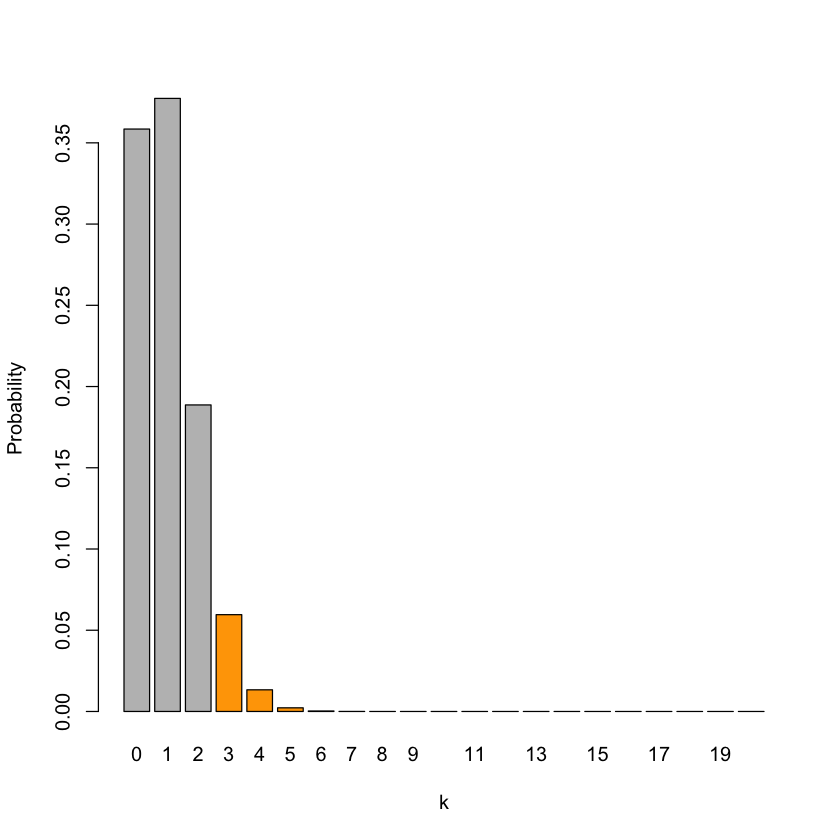

In [14]:
numhouse = 0:20
cbProb <- dbinom(numhouse,  20, 0.05) 
names(cbProb) = c(numhouse)
barplot(cbProb, ylab="Probability", xlab="k", col=ifelse(numhouse >= 3, "orange", "grey") )

### Poisson distribution
QUESTION: Birth in a hospital occur randomly at an average rate of 1.8 births per hours. what is the probability of observing exactly 4 births in a given hour at the hospital? What about the probability of obeserving more than or equal to 2 births in a given hospital?

[1] 0.07230173

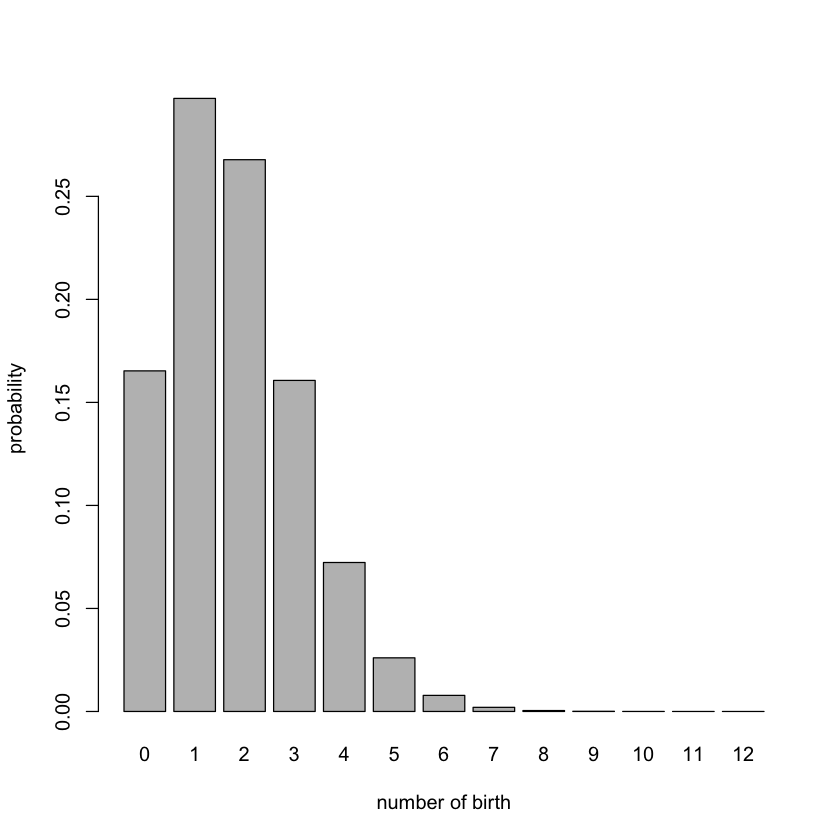

In [15]:
dpois(4, lambda = 1.8)
countbirth = c(0:12)
probbirth = dpois(countbirth, lambda = 1.8)
names(probbirth) = countbirth
barplot(probbirth, ylab = "probability", xlab = "number of birth")

### Normal distribution
QUESTION: Can you repeat the code below by generating numbers from the Chi-square distribution with degree of freedom 2 instead of Normal distribution?


	Shapiro-Wilk normality test

data:  myRandomNumbers
W = 0.99941, p-value = 0.8149


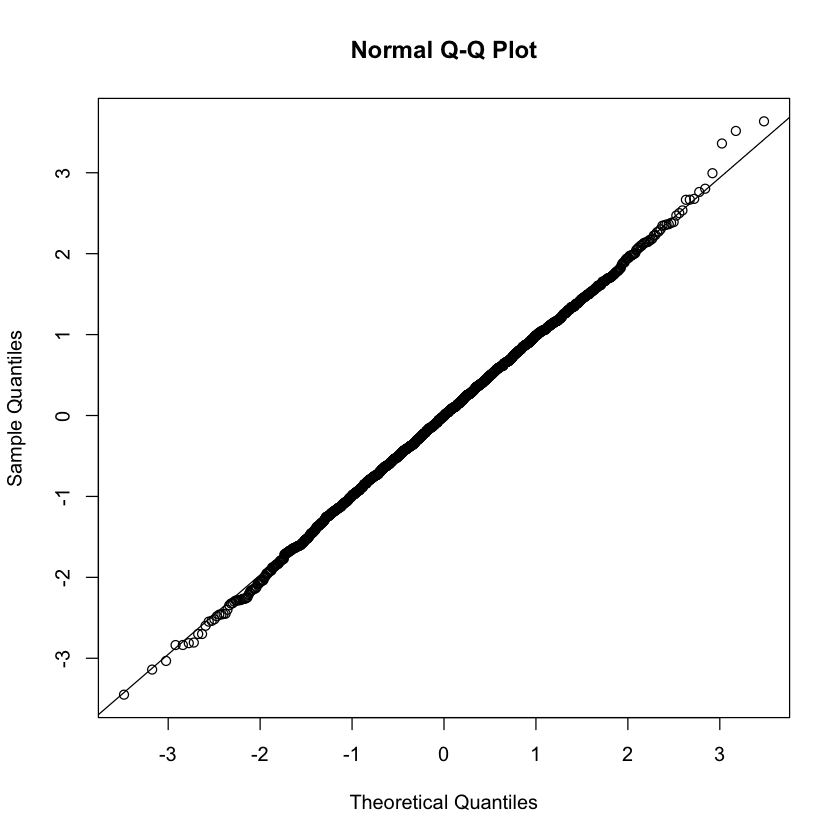

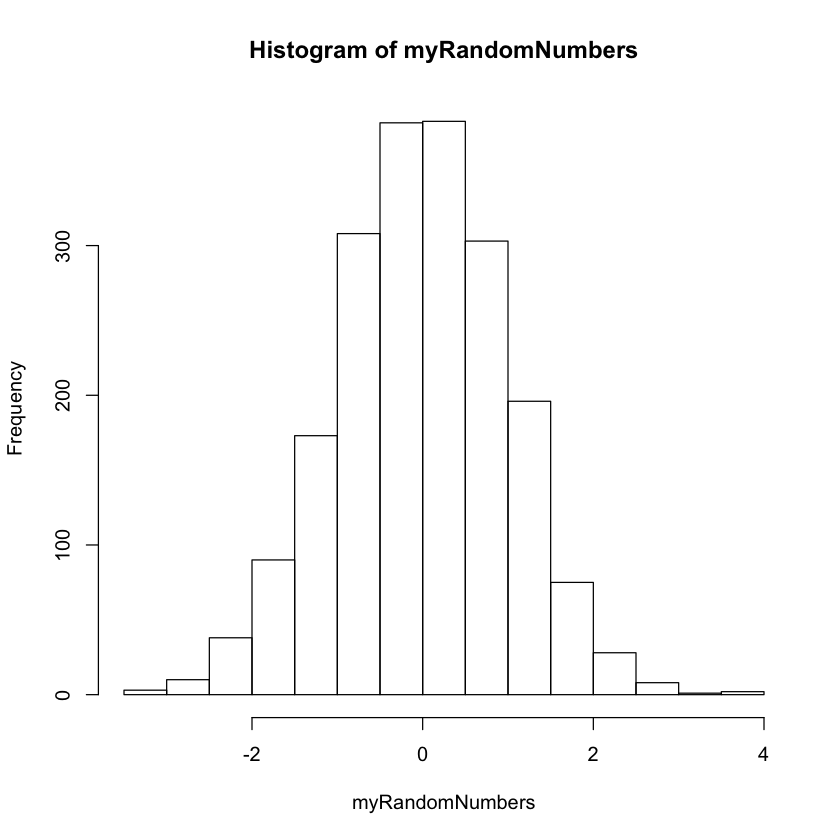

In [16]:
myRandomNumbers = rnorm(2000, 0, 1)
shapiro.test(myRandomNumbers)
qqnorm(myRandomNumbers)
qqline(myRandomNumbers)
hist(myRandomNumbers)

### Paired t test
QUESTION: Oral Contraceptive (OC) study with a group of nonpregnant, premenopausal women of age (16-49) who are not currently OC user measured their blood pressure and call this baseline blood pressure. After one year, rescreen these women to ascertain a subgroup who have remained nonpregnant throughout the year and have become OC users. And measure the blood pressure of this study population at the follow-up visit. What is the mean of the difference in systolic blood pressure between two groups?

In [17]:
sbpBaseline <- c(115, 112, 107, 119, 115, 138, 126, 105, 104, 115)
sbpUsingOC  <- c(128, 115, 106, 128, 122, 145, 132, 109, 102, 117)
t.test(sbpBaseline, sbpUsingOC, paired = TRUE)


	Paired t-test

data:  sbpBaseline and sbpUsingOC
t = -3.3247, df = 9, p-value = 0.008874
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.066013 -1.533987
sample estimates:
mean of the differences 
                   -4.8 


### Two-sample t-test
QUESTION: Is there a significant difference in birth weight between smoker and non-smokers during pregnancy?

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622



	Welch Two Sample t-test

data:  birthwt$bwt[birthwt$ui == 1] and birthwt$bwt[birthwt$ui == 0]
t = -3.8615, df = 35.696, p-value = 0.000455
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -886.6553 -275.8913
sample estimates:
mean of x mean of y 
 2449.429  3030.702 


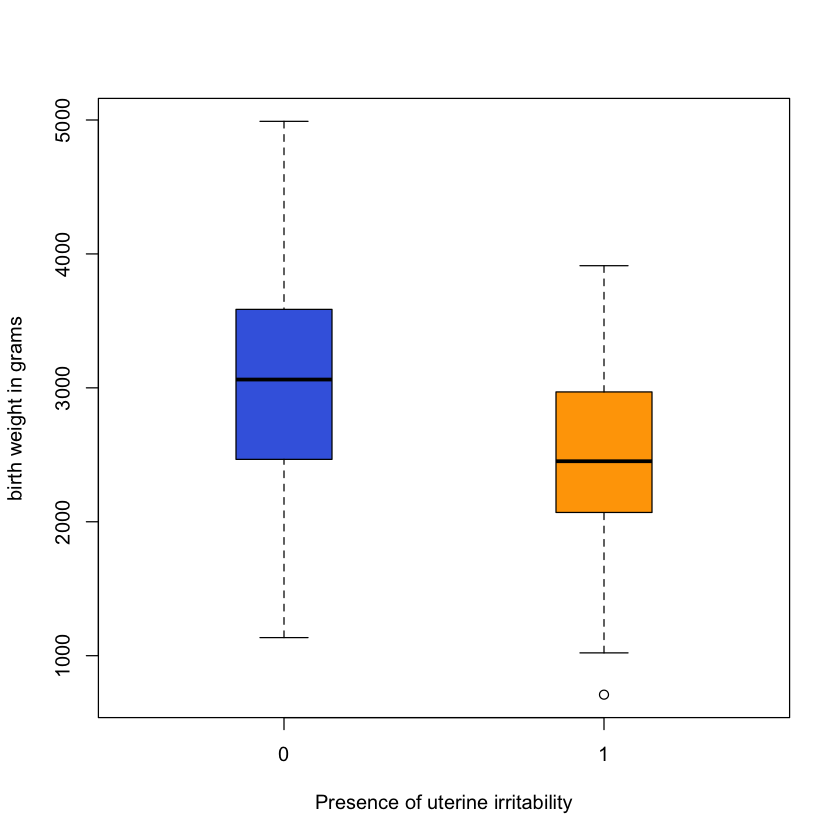

In [18]:
data(birthwt)
head(birthwt)
boxplot( bwt ~ factor(ui), data = birthwt, boxwex=0.3,  col = c("royalblue", "orange"),
         ylab = "birth weight in grams", xlab = "Presence of uterine irritability")
t.test( birthwt$bwt[birthwt$ui==1], birthwt$bwt[birthwt$ui==0], paired = FALSE)

### Wilcoxon rank-sum test, a non-parametric test for two independent samples
QUESTION: Why might a t-test not be useful to ccompare the hospital Length Of Stay (LOS) between two hospitals A and B?

In [19]:
LOS.hospitalA = c(21, 10, 32, 60, 8, 44, 29, 5, 13, 26, 33)
LOS.hospitalB = c(86, 27, 10, 68, 87, 76, 125, 60, 35, 73, 96, 44, 238)
wilcox.test(LOS.hospitalA , LOS.hospitalB) 

Warning message in wilcox.test.default(LOS.hospitalA, LOS.hospitalB):
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  LOS.hospitalA and LOS.hospitalB
W = 17.5, p-value = 0.001925
alternative hypothesis: true location shift is not equal to 0


### Logistic Regression.


In [20]:
data(birthwt)
bwt.df <- with(birthwt, {
  race <- factor(race, labels = c("white", "black", "other"))
  ptd <- factor(ptl > 0)
  ftv <- factor(ftv)
  levels(ftv)[-(1:2)] <- "2+"
  data.frame(low = factor(low), bwt, age, lwt, race, smoke = (smoke > 0),
             ptd, ht = (ht > 0), ui = (ui > 0), ftv)
})

### Exploratory Data Analysis 
QUESTION: Can you create a similar boxplot of bwt along smoking status?

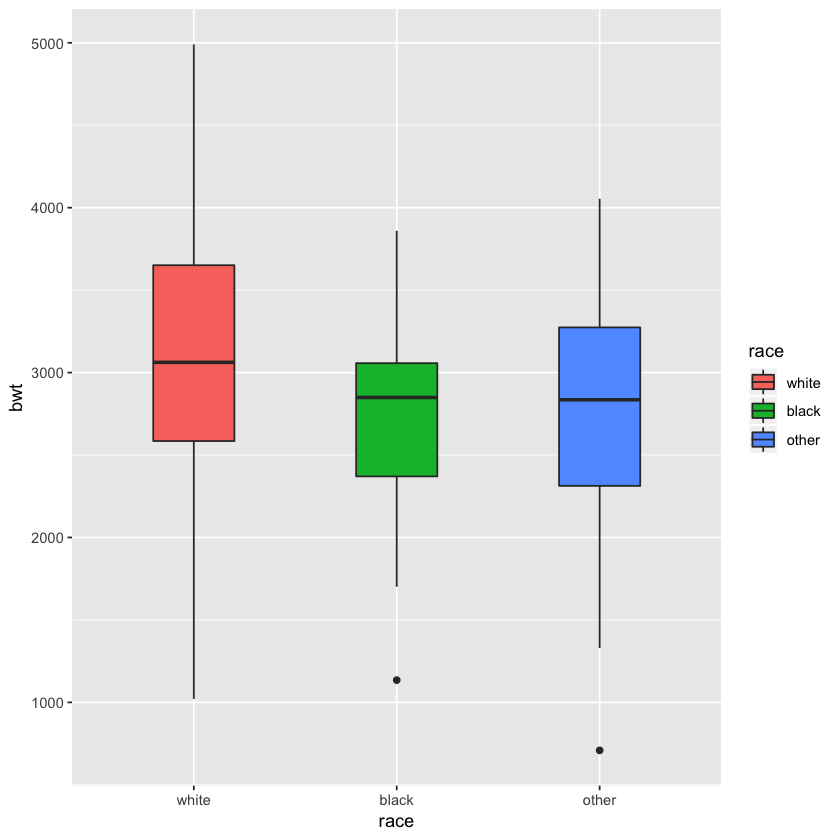

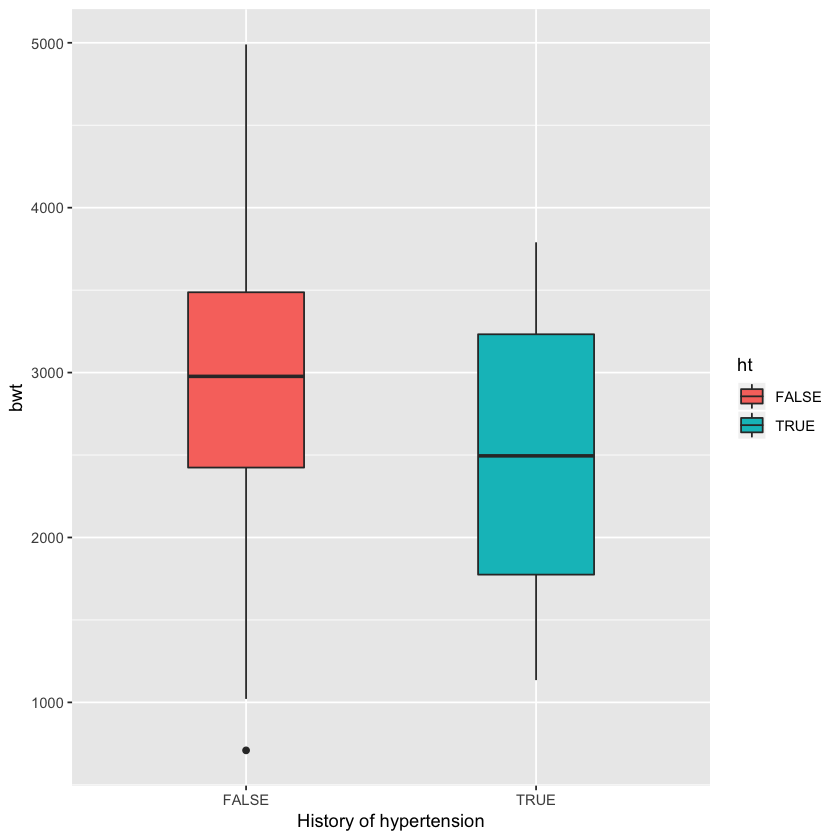

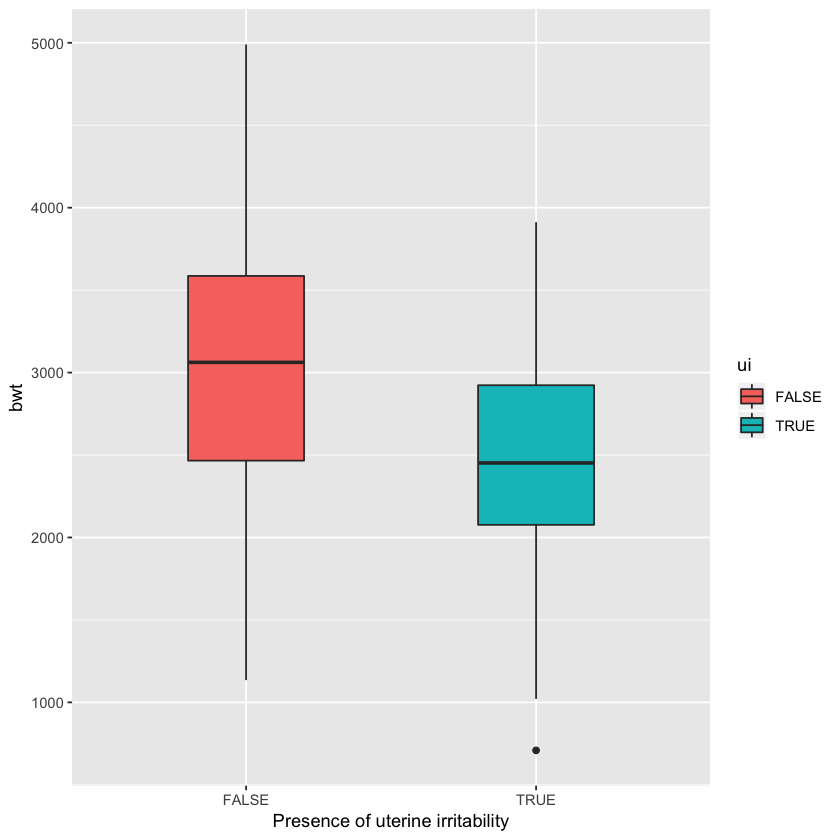

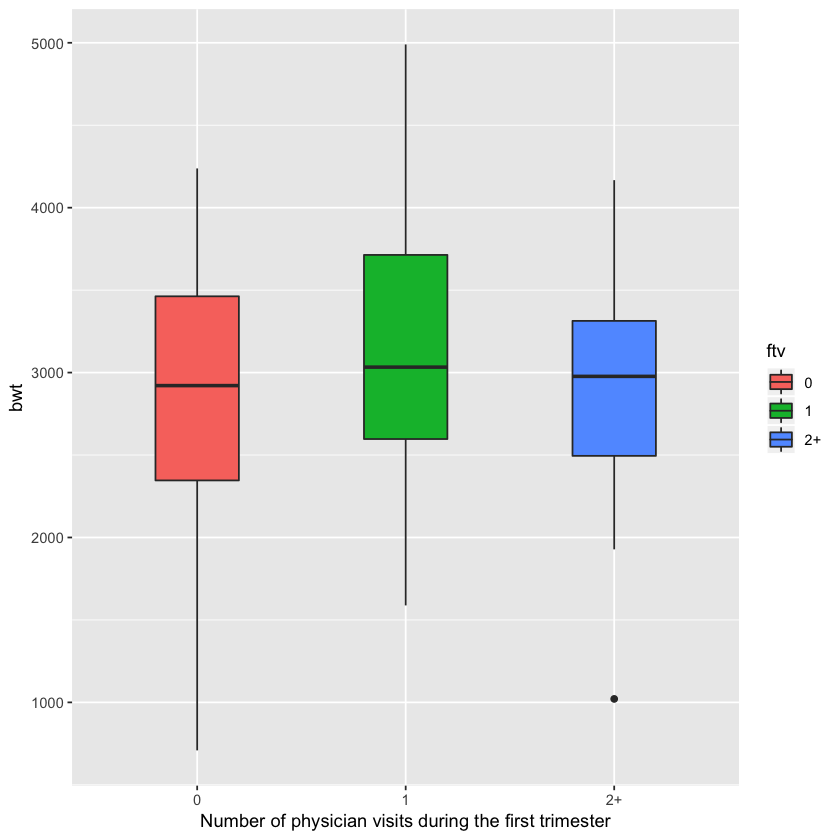

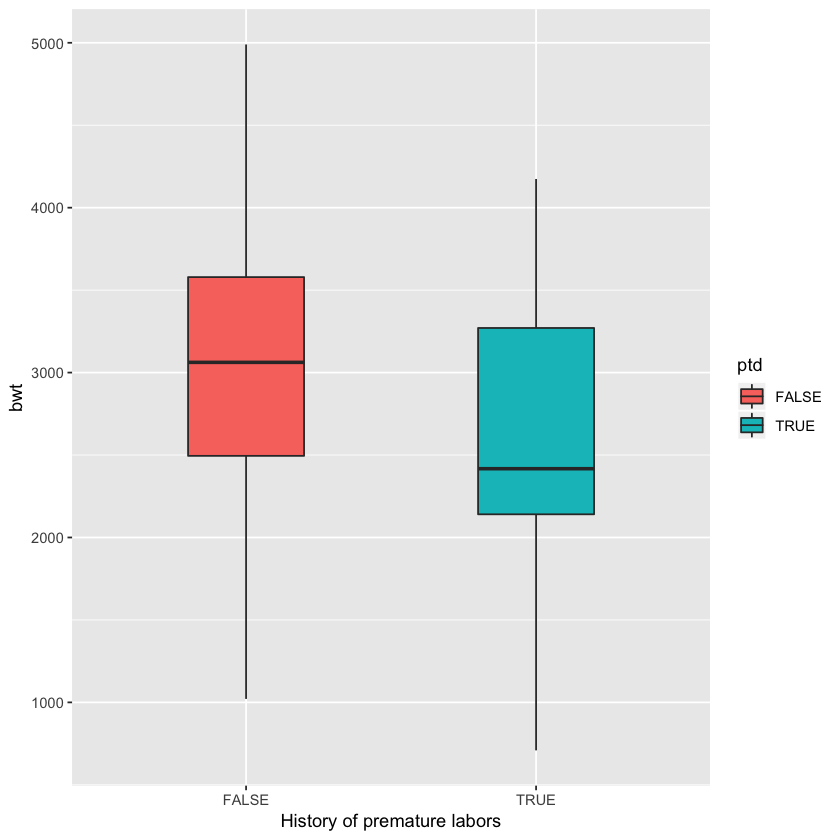

In [21]:
### Exploratory data analysis
ggplot(bwt.df, aes(x=race, y=bwt, fill=race)) + geom_boxplot(width=0.4) 
ggplot(bwt.df, aes(x=ht, y=bwt, fill=ht)) + 
  geom_boxplot(width=0.4) + xlab("History of hypertension")
ggplot(bwt.df, aes(x=ui, y=bwt, fill=ui) ) + 
  geom_boxplot(width=0.4) + xlab("Presence of uterine irritability")
ggplot(bwt.df, aes(x=ftv, y=bwt, fill=ftv)) +
   geom_boxplot(width=0.4) + xlab("Number of physician visits during the first trimester")
ggplot(bwt.df, aes(x=ptd, y=bwt, fill=ptd)) + 
  geom_boxplot(width=0.4)  + xlab("History of premature labors")

### Fit a logistic regression model 

In [22]:
bwt <- with(birthwt, {
  race <- factor(race, labels = c("white", "black", "other"))
  ptd <- factor(ptl > 0)
  ftv <- factor(ftv)
  levels(ftv)[-(1:2)] <- "2+"
  data.frame(low = factor(low), age, lwt, race, smoke = (smoke > 0),
             ptd, ht = (ht > 0), ui = (ui > 0), ftv)
})
options(contrasts = c("contr.treatment", "contr.poly"))
m1 = glm(low ~ ., data = bwt, family = "binomial")
summary(m1)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.82301896,1.24471433,0.6612111,0.508476929
age,-0.03723429,0.03870238,-0.9620671,0.336015876
lwt,-0.01565301,0.00708041,-2.2107487,0.027053243
raceblack,1.19241321,0.53596458,2.2247986,0.026094765
raceother,0.74068488,0.46174434,1.6041017,0.108691633
smokeTRUE,0.75552837,0.42501665,1.7776442,0.075462312
ptdTRUE,1.34376338,0.48062070,2.7958916,0.005175676
htTRUE,1.91316586,0.72073686,2.6544582,0.007943589
uiTRUE,0.68019548,0.46434032,1.4648641,0.142957993
ftv1,-0.43637967,0.47939359,-0.9102743,0.362677854


### Model calibration
QUESTION: Which probability bin has the most ambiguous mix of two lables (low vs. normal)?

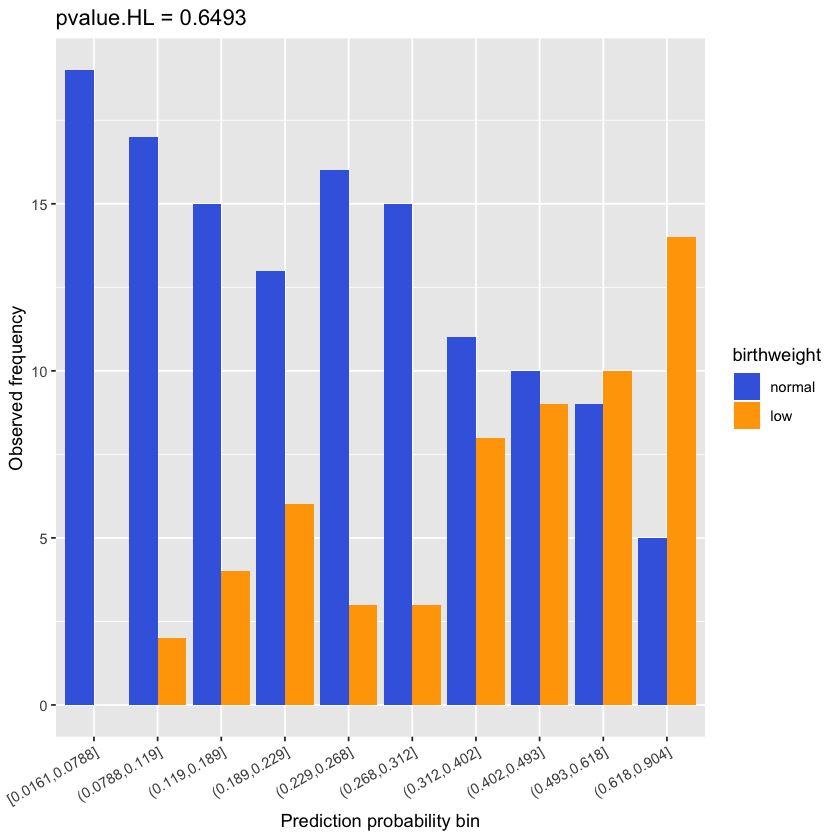

In [23]:
myhl = hoslem.test(m1$y, m1$fitted.values, g=10)
mycalib = data.frame(  
            predictionbin = factor(  c( rownames(myhl$observed), 
                                        rownames(myhl$observed)),
                                    levels = rownames(myhl$observed)),
            observedfreq = c(myhl$observed[,1], myhl$observed[,2]),
            birthweight = factor( c( rep("normal", 10), rep("low", 10) ),
                                  levels = c("normal", "low")) )
ggplot(data=mycalib, 
         aes(x=predictionbin, y=observedfreq, fill = birthweight)) +
      geom_bar(stat="identity", position=position_dodge()) +
      theme(axis.text.x=element_text(angle=30, hjust=1) ) +
     scale_fill_manual(values = c("royalblue", "orange")) +
     ylab("Observed frequency") +
     xlab("Prediction probability bin") +
     ggtitle( paste("pvalue.HL = ", round(myhl$p.value, 4), sep=""))


### Survival analysis with lung cancer
Loprinzi et al.  Journal of Clinical Oncology. 12(3):601-7, 1994.
inst:	Institution code
time:	Survival time in days
status:	censoring status 1=censored, 2=dead
age:	Age in years
sex:	Male=1 Female=2
ph.ecog:	ECOG performance score (0=good 5=dead)
ph.karno:	Karnofsky performance score (bad=0-good=100) rated by physician
pat.karno:	Karnofsky performance score as rated by patient
meal.cal:	Calories consumed at meals
wt.loss:	Weight loss in last six months

In [24]:
data(lung)
head(lung)
m1.surv = survfit( Surv(time,status) ~ sex, data = lung)
print(m1.surv)

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0


Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550


### Kaplan-Meier curve
QUESTION: What is the median survival time for male?

Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=1 138      112     91.6      4.55      10.3
sex=2  90       53     73.4      5.68      10.3

 Chisq= 10.3  on 1 degrees of freedom, p= 0.001 

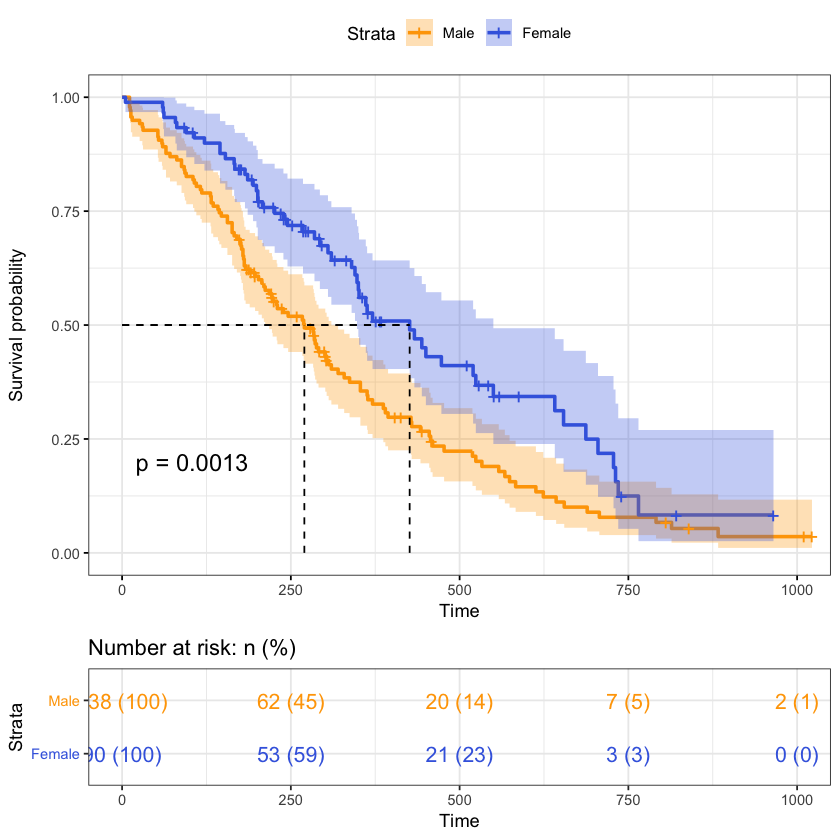

In [25]:
m1.diff = survdiff(Surv(time, status) ~ sex, data = lung)
m1.diff
ggsurvplot(m1.surv, data = lung, conf.int = TRUE, pval = TRUE, 
           palette = c("orange", "royalblue"),
           legend.labs =  c("Male", "Female"), surv.median.line = "hv",
           risk.table = "abs_pct", risk.table.col = "strata", ggtheme = theme_bw() )

### survival analysis: Cox Proportional Hazards (PH) model

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog, data = lung)

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

             coef exp(coef)  se(coef)      z Pr(>|z|)    
age      0.011067  1.011128  0.009267  1.194 0.232416    
sex     -0.552612  0.575445  0.167739 -3.294 0.000986 ***
ph.ecog  0.463728  1.589991  0.113577  4.083 4.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
age        1.0111     0.9890    0.9929    1.0297
sex        0.5754     1.7378    0.4142    0.7994
ph.ecog    1.5900     0.6289    1.2727    1.9864

Concordance= 0.637  (se = 0.026 )
Rsquare= 0.126   (max possible= 0.999 )
Likelihood ratio test= 30.5  on 3 df,   p=1e-06
Wald test            = 29.93  on 3 df,   p=1e-06
Score (logrank) test = 30.5  on 3 df,   p=1e-06


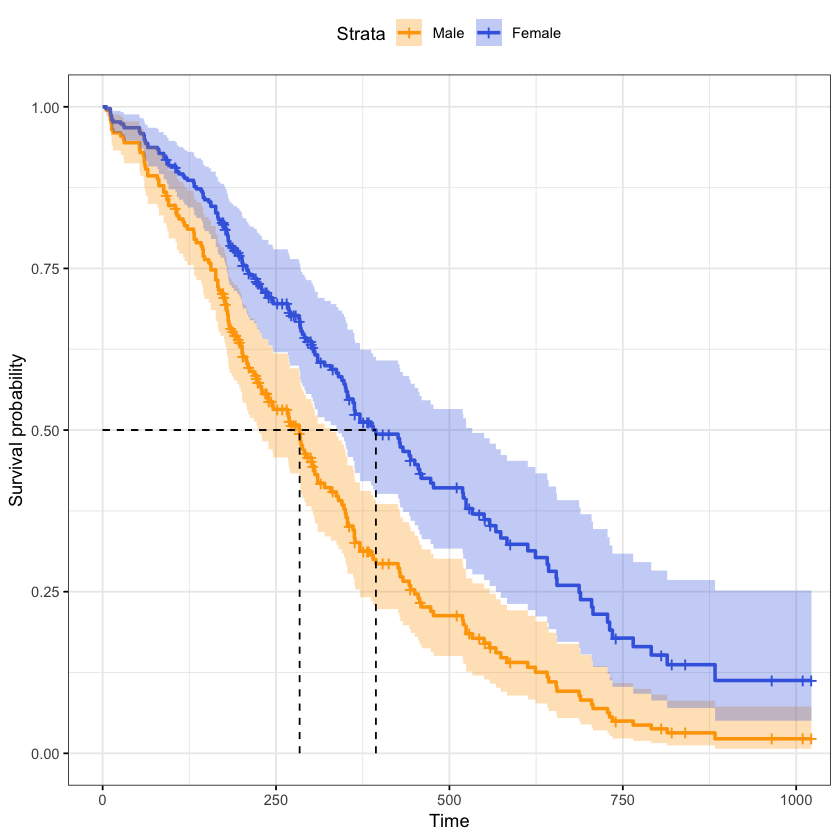

In [26]:
m.coxPH <- coxph(Surv(time, status) ~ age + sex + ph.ecog, data =  lung)
summary(m.coxPH)
sex_df <- with(lung,
               data.frame(sex = c(1, 2), 
                          age = rep(mean(age, na.rm = TRUE), 2),
                          ph.ecog = c(1, 1)
               )
)
m2.surv <- survfit(m.coxPH, newdata = sex_df)
ggsurvplot(m2.surv, data = sex_df, conf.int = TRUE, 
           palette = c("orange", "royalblue"), 
           legend.labs= c("Male", "Female"),  surv.median.line = "hv",
           ggtheme = theme_bw() )


### Meta-analysis odds ratio
A randomised trial of corticosteroid therapy in premature labor and its effect on neonatal death.

name,ev.trt,n.trt,ev.ctrl,n.ctrl
Auckland,36,532,60,538
Block,1,69,5,61
Doran,4,81,11,63
Gamsu,14,131,20,137
Morrison,3,67,7,59
Papageorgiou,1,71,7,75


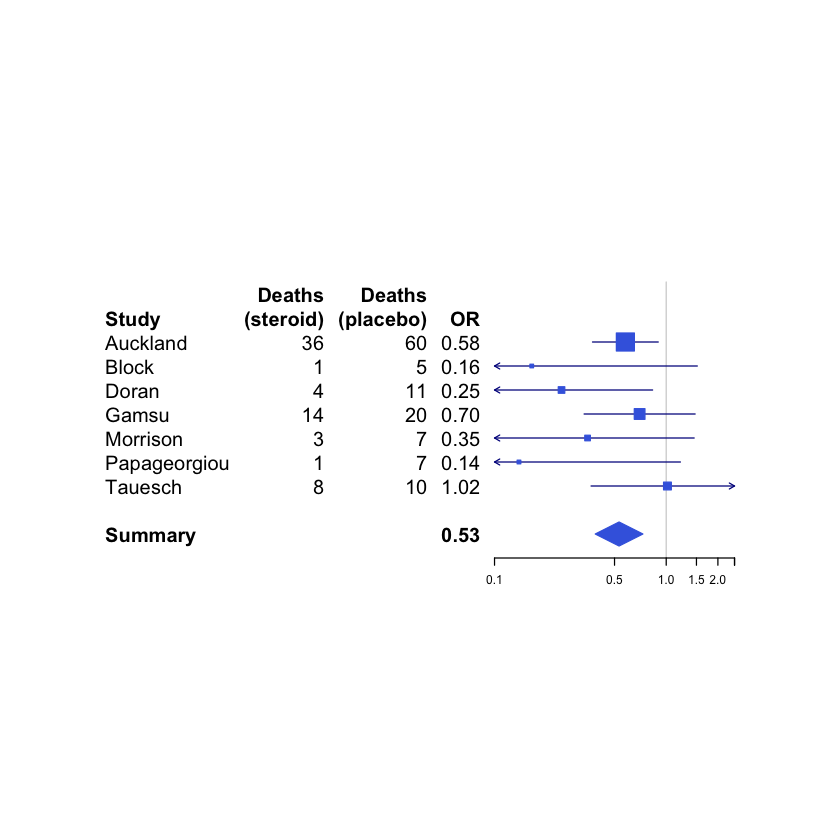

In [27]:
data( cochrane )
head( cochrane )
steroid <- meta.MH(n.trt, n.ctrl, 
                   ev.trt, ev.ctrl,
                   names=name, data=cochrane)
tabletext <- cbind( 
  c("","Study",steroid$names,NA,"Summary"),
  c("Deaths","(steroid)",cochrane$ev.trt,NA,NA),
  c("Deaths","(placebo)", cochrane$ev.ctrl, NA,NA),
  c("","OR",format(exp(steroid$logOR),digits=2),NA,format(exp(steroid$logMH),digits=2))
)
m.ci <-     c(NA, NA, steroid$logOR,   NA, steroid$logMH)
l.ci <- m.ci - c(NA, NA, steroid$selogOR, NA, steroid$selogMH)*2
u.ci <- m.ci + c(NA, NA, steroid$selogOR, NA, steroid$selogMH)*2

forestplot(tabletext, m.ci, l.ci, u.ci, zero=0, 
           is.summary=c(TRUE,TRUE,rep(FALSE,8),TRUE),
           clip=c(log(0.1),log(2.5)), 
           xlog=TRUE,
           col=meta.colors(box="royalblue", 
                           line="darkblue", 
                           summary="royalblue"))

### References
Hosmer, DW and Lemeshow, S. Applied survival analysis

Rosner, B. Fundamentals of Biostatistics